# Coding Discussion #4
##### Madeline Kinnaird

In [21]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [7]:
# Read in the data

aj = open("../Data/aljazeera-khashoggi.txt", "r", encoding = "UTF-8").read()
bbc = open("../Data/bbc-khashoggi.txt", "r", encoding = "UTF-8").read()
bre = open("../Data/breitbart-khashoggi.txt", "r", encoding = "UTF-8").read()
cnn = open("../Data/cnn-khashoggi.txt", "r", encoding = "UTF-8").read()
fox = open("../Data/fox-khashoggi.txt", "r", encoding = "UTF-8").read()
stop_words = pd.read_csv('../Data/stop_words.csv')

In [8]:
# Convert stopwords into a list
stop_words = stop_words.word.to_list()

# Clean and Restructure Data

In [11]:
def tokenize(text=None):
    '''
    Function: Tokenize text object a count by number of words in text
    
    Input: Text object
    Output: dataframe, with counts per word
    '''
    d = dict()
    text = text.lower()
    ## regex to break line into only words
    text = re.sub(r"[^\w\s]+", '', text) 
    ## create list of words
    word_list = text.split()
    ## remove stop words and turn into a list
    word_list = list(filter(lambda a: a not in stop_words, word_list))
    for word in word_list:
        if word in d:
            d[word][0] += 1
        else:
            d[word] = [1]

    return pd.DataFrame(d)



In [12]:
## create Document Term Matrix
article_list = [aj,bbc,bre,cnn,fox]

## create a blank dataframe for DTM
DTM = pd.DataFrame()

##loop through articles and append tokenized df to DTM
for article in article_list:
    df = tokenize(article)
    #Row bing
    DTM = DTM.append(df, ignore_index=True,sort=True)

    
## fill na's with zeros
DTM.fillna(0, inplace=True) 

## rename rows
DTM = DTM.rename({0: "aljazeera", 1: "bbc",2:"breitbart",3:"cnn",4:"fox"}, axis='index')


In [13]:
## check it out!

DTM

,1,108,11,12,15,15member,18,2,28,2r,...,weeks,white,widely,withheld,woods,world,worse,writer,yalova,yelova
aljazeera,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bbc,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
breitbart,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
cnn,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
fox,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0


# Compare Data

In [14]:
def cosine(a,b):
    '''
    Function: Compare vectors and return similiarity between 0 to 1
    
    Input: Two vectors/lists (a,b)
    Output: float, number between 0 and 1
    
    '''
    cos = np.dot(a,b)/(np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b))  )
    return cos

In [15]:
# New dataframe for cosine similiarities, with dimensions of DTM indexes 
index = DTM.index.values
columns = DTM.index.values

cosine_matrix = pd.DataFrame(index = index, columns = columns)


In [16]:
## loop through combinations and fill cosine matrix

for column in cosine_matrix.columns:
    for row in cosine_matrix.index:
        cosine_matrix.loc[row, column] = cosine(DTM.loc[row], DTM.loc[column])


In [65]:
## turn values into floats and take a look
cosine_matrix = cosine_matrix.astype(float)
cosine_matrix

,aljazeera,bbc,breitbart,cnn,fox
aljazeera,1.000000,0.678938,0.598039,0.533123,0.695217
bbc,0.678938,1.000000,0.596260,0.503919,0.645459
breitbart,0.598039,0.596260,1.000000,0.377132,0.552834
cnn,0.533123,0.503919,0.377132,1.000000,0.534126
fox,0.695217,0.645459,0.552834,0.534126,1.000000


# Analyze

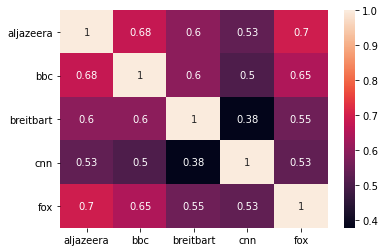

In [61]:
## heatmap based on similarities 
cosine_matrix= cosine_matrix.astype(float)
sns.heatmap(cosine_matrix, annot = True)

##### Most Similiarty

Fox and Aljazeera: (.70)

BBC and Aljazeera: (.68) 
This makes sense, both are non-USA based organizations.

##### Least Similiarty

CNN and Breitbart: (.38)
Stereotypically, CNN leans left and Breitbart leans right.